In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.stats import gmean
from pylab import cm

#pd.set_option('display.float_format', lambda x : f'{x:.3f}')
pd.set_option('display.max_columns', 99)
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab20', 10)

In [2]:
from pathlib import Path
print(f"Working Directory: {Path.cwd()}")

Working Directory: C:\Users\ashry\OneDrive - National University of Singapore\NUS\Year 4\ST4199 Final Year Project in Statistics\st4199\data


In [3]:
msci = pd.read_excel('msci.xlsx', sheet_name='Sheet1', engine='openpyxl', header=1)
print(msci.shape)
daily = pd.read_csv('pf_daily-final.csv', parse_dates=['date'], infer_datetime_format=True, index_col=0)
print(daily.shape)
results = pd.read_csv('pf_result-final.csv', parse_dates=['date'], infer_datetime_format=True, index_col=0)
print(results.shape)
results.tail()

(5215, 2)
(1004, 30)
(11, 50)


,mv_gross_no_trading_cost,mv_net_no_trading_cost,mv_budget_no_trading_cost,mv_turnover_no_trading_cost,mv_volatility_no_trading_cost,mv_constraints_gross_no_trading_cost,mv_constraints_net_no_trading_cost,mv_constraints_budget_no_trading_cost,mv_constraints_turnover_no_trading_cost,mv_constraints_volatility_no_trading_cost,mi_constraints_gross_no_trading_cost,mi_constraints_net_no_trading_cost,mi_constraints_budget_no_trading_cost,mi_constraints_turnover_no_trading_cost,mi_constraints_volatility_no_trading_cost,ew_gross_no_trading_cost,ew_net_no_trading_cost,ew_no_trading_cost,ew_turnover_no_trading_cost,ew_volatility_no_trading_cost,capm_constraints_gross_no_trading_cost,capm_constraints_net_no_trading_cost,capm_no_trading_cost,capm_constraints_turnover_no_trading_cost,capm_constraints_volatility_no_trading_cost,mv_gross,mv_net,mv_budget,mv_turnover,mv_volatility,mv_constraints_gross,mv_constraints_net,mv_constraints_budget,mv_constraints_turnover,mv_constraints_volatility,mi_constraints_gross,mi_constraints_net,mi_constraints_budget,mi_constraints_turnover,mi_constraints_volatility,ew_gross,ew_net,ew,ew_turnover,ew_volatility,capm_constraints_gross,capm_constraints_net,capm,capm_constraints_turnover,capm_constraints_volatility
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-29,35508666.64,35120564.99,138363475.1,-1.205903,0.049959,24123572.40,23866832.00,122236913.9,-0.534277,0.042750,21894646.88,21602627.00,124293789.5,1.004906,0.074647,-96430.337,-497096.5384,131350039.7,7.686636,0.021659,7.766380e+07,7.729998e+07,111024327.4,1.660986,0.004271,6209005.494,1.891265e+06,24252291.07,-7.854690,0.049959,16844861.64,1.101406e+07,81508972.44,-0.780748,0.033158,19887161.33,1.243162e+07,81743706.73,-0.299309,0.036824,-5834.794,-65308.10884,1502680.677,0.865130,0.021659,5884307.462,1549146.472,47271578.60,2.525455,0.234608
2018-09-28,38767561.56,38347370.41,145489693.0,-1.572616,0.080891,38977648.22,38662722.82,128645201.7,0.461967,0.060783,32874156.51,32533419.43,128567515.1,-0.347390,0.076381,-70098.306,-489765.2308,137100759.6,205.754500,0.013907,1.171532e+08,1.167652e+08,116029893.1,0.595579,0.000268,5647309.663,1.613484e+06,21242546.92,-7.657839,0.080891,22216056.33,1.504693e+07,79883877.78,0.286583,0.062851,21295926.53,1.412720e+07,79342096.24,-0.377088,0.069533,-5501.160,-72395.03206,1512089.050,15.393321,0.013907,7464704.333,3160799.424,44477141.79,2.579221,0.060745
2018-12-31,21360763.80,21028047.88,118796924.3,-4.381058,139.148312,20288377.01,20035285.54,105125780.7,-2.085376,1.921626,14461262.24,14195548.49,105162588.4,-3.626616,3.748384,186503.360,-141138.9298,107541139.5,487.386436,0.824813,1.912107e+07,1.872549e+07,103825973.0,-10.426044,0.994088,2389775.640,-6.160908e+05,13366039.02,20.142811,139.148373,10687072.03,6.063209e+06,58216470.55,-4.033277,2.390622,10055422.18,5.611202e+06,57805739.77,-5.749285,6.567150,-5240.294,-83527.21782,1122444.360,7.911194,0.824813,4347973.643,-1399799.695,32826328.88,0.314188,1.352249
2019-03-29,26598929.24,26265953.59,129596040.2,1.581595,0.278053,26189680.75,25941374.09,118777931.0,-0.066130,0.144827,22190225.65,21925260.66,117716285.4,0.943341,0.290402,69756.789,-269956.5801,122843689.5,193.240335,0.063767,7.469726e+07,7.433812e+07,117751017.4,1.372791,0.007575,2368308.399,8.456337e+05,11612253.00,5.246953,0.278053,12682140.31,8.494870e+06,61413923.28,-0.459772,0.155592,13421525.56,8.855053e+06,60649180.86,0.047566,0.197879,-4698.863,-59493.93297,1206178.540,6.901544,0.063767,3507989.723,2258525.176,31197374.04,-1.129587,0.085835
2019-06-28,26018187.20,25639733.15,128750511.0,0.547338,0.495072,23751350.02,23484569.01,119514675.5,0.241163,0.058193,18133934.25,17847793.69,117402591.9,-0.165197,0.192802,-245926.930,-616595.8504,118487008.0,-34.345350,0.039598,7.286894e+07,7.260593e+07,118254371.9,0.340617,0.004569,2010691.544,8.166079e+05,10039237.43,1.189432,0.495072,10212263.47,6.068145e+06,57830335.79,0.191442,0.086011,11187106.41,6.313214e+06,56938166.98,1.043827,0

In [4]:
benchmark = msci.set_index('Exchange Date')['Close']
benchmark.name = 'msci'
benchmark

Exchange Date
2020-10-30    3166.928
2020-10-29    3211.529
2020-10-28    3174.676
2020-10-27    3288.821
2020-10-26    3297.405
                ...   
2000-11-08    1347.682
2000-11-07    1368.825
2000-11-06    1368.281
2000-11-03    1362.757
2000-11-02    1365.484
Name: msci, Length: 5215, dtype: float64

# Backtest Results

In [5]:
daily.tail()

,mv_gross_nav_no_trading_cost,mv_net_nav_no_trading_cost,mv_no_trading_cost,mv_constraints_gross_no_trading_cost,mv_constraints_net_no_trading_cost,mv__no_trading_cost,mi_constraints_gross_no_trading_cost,mi_constraints_net_no_trading_cost,mi_no_trading_cost,ew_gross_nav_no_trading_cost,ew_net_nav_no_trading_cost,ew_no_trading_cost,capm_constraints_gross_no_trading_cost,capm_constraints_net_no_trading_cost,capm_no_trading_cost,mv_gross_nav,mv_net_nav,mv,mv_constraints_gross,mv_constraints_net,mv_,mi_constraints_gross,mi_constraints_net,mi,ew_gross_nav,ew_net_nav,ew,capm_constraints_gross,capm_constraints_net,capm
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-25,30100043.0,29721589.0,130017629.3,25495010.0,25228229.0,121626702.8,20320507.0,20034367.0,119642019.4,4842098.0,4471429.0,119225839.0,73077849.0,72814833.0,119236839.6,2328552.0,1134468.0,8968780.476,11050300.0,6906181.0,54767944.77,12043260.0,7169368.0,53218538.34,38108.0,-16339.0,1067478.333,4288670.0,1525888.0,27972257.96
2019-09-26,30231332.0,29852878.0,128850987.0,25665282.0,25398501.0,120840801.3,20455475.0,20169335.0,118685748.7,5199245.0,4828577.0,117939773.0,72779187.0,72516171.0,118225053.7,2338723.0,1144640.0,8877875.363,11132106.0,6987988.0,54350135.78,12125570.0,7251677.0,52761233.88,41367.0,-13080.0,1055548.198,4233771.0,1470989.0,27744364.83
2019-09-27,29987891.0,29609437.0,128299145.7,25623929.0,25357148.0,120304654.1,20348022.0,20061881.0,118183665.5,5341719.0,4971050.0,117635638.8,72218489.0,71955473.0,117697313.8,2319850.0,1125766.0,8834855.530,11104274.0,6960155.0,54109197.68,12120706.0,7246813.0,52517241.73,42749.0,-11698.0,1052667.179,4244402.0,1481620.0,27633166.15
2019-09-28,29987891.0,29609437.0,128299145.7,25623929.0,25357148.0,120304654.1,20348022.0,20061881.0,118183665.5,5341719.0,4971050.0,117635638.8,72218489.0,71955473.0,117697313.8,2319850.0,1125766.0,8834855.530,11104274.0,6960155.0,54109197.68,12120706.0,7246813.0,52517241.73,42749.0,-11698.0,1052667.179,4244402.0,1481620.0,27633166.15
2019-09-29,29987891.0,29609437.0,128299145.7,25623929.0,25357148.0,120304654.1,20348022.0,20061881.0,118183665.5,5341719.0,4971050.0,117635638.8,72218489.0,71955473.0,117697313.8,2319850.0,1125766.0,8834855.530,11104274.0,6960155.0,54109197.68,12120706.0,7246813.0,52517241.73,42749.0,-11698.0,1052667.179,4244402.0,1481620.0,27633166.15


In [6]:
# no trading cost
mv_no_tc = daily.iloc[:,np.r_[0:3]].copy()
mv_constraints_no_tc = daily.iloc[:,np.r_[3:6]].copy()
mi_constraints_no_tc = daily.iloc[:,np.r_[6:9]].copy()
ew_no_tc = daily.iloc[:,np.r_[9:12]].copy()
capm_no_tc = daily.iloc[:,np.r_[12:15]].copy()
# trading cost
mv = daily.iloc[:,np.r_[15:18]].copy()
mv_constraints = daily.iloc[:,np.r_[18:21]].copy()
mi_constraints= daily.iloc[:,np.r_[21:24]].copy()
ew = daily.iloc[:,np.r_[24:27]].copy()
capm = daily.iloc[:,np.r_[27:30]].copy()

In [7]:
return_dfs = [mv_no_tc, mv_constraints_no_tc, mi_constraints_no_tc, ew_no_tc, capm_no_tc, mv, mv_constraints, mi_constraints, ew, capm]
for i, return_df in enumerate(return_dfs):
    return_dfs[i]['trading_cost'] = return_df.iloc[:,0] - return_df.iloc[:,1]
    return_dfs[i]['net'] = return_df.iloc[:,2]
    return_dfs[i]['gross'] = return_df['net'] + return_df['trading_cost']
    return_dfs[i] = return_dfs[i] / 1e8 - 1
    return_dfs[i] = pd.merge(return_dfs[i].iloc[:,4:6], benchmark, left_index=True, right_index=True)
    return_dfs[i]['msci'] = return_dfs[i]['msci'] / return_dfs[i]['msci'].iloc[0] - 1
    #print(return_dfs[i].tail())

## Cumulative Total Return

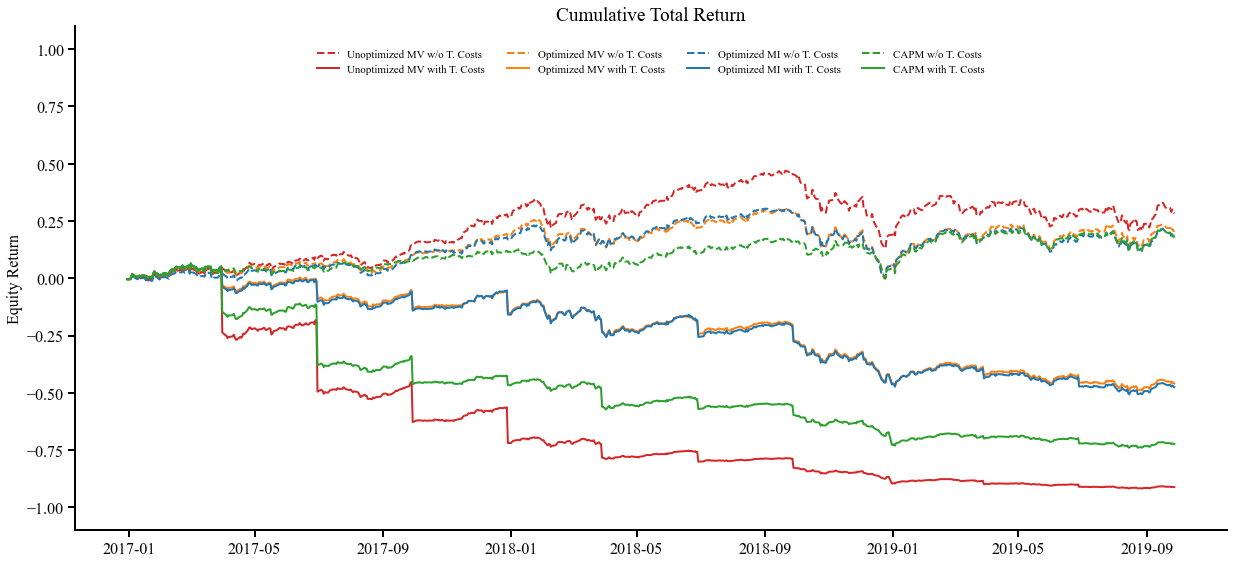

In [8]:
# Plot Daily Portfolio Performance Values
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.yaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(return_dfs[0]['net'], linewidth=2, linestyle='dashed', color=colors(3), label='Unoptimized MV w/o T. Costs')
ax.plot(return_dfs[5]['net'], linewidth=2, color=colors(3), label='Unoptimized MV with T. Costs')
ax.plot(return_dfs[1]['net'], linewidth=2, linestyle='dashed', color=colors(1), label='Optimized MV w/o T. Costs')
ax.plot(return_dfs[6]['net'], linewidth=2, color=colors(1), label='Optimized MV with T. Costs')
ax.plot(return_dfs[2]['net'], linewidth=2, linestyle='dashed', color=colors(0), label='Optimized MI w/o T. Costs')
ax.plot(return_dfs[7]['net'], linewidth=2, color=colors(0), label='Optimized MI with T. Costs')
ax.plot(return_dfs[4]['net'], linewidth=2, linestyle='dashed', color=colors(2), label='CAPM w/o T. Costs')
ax.plot(return_dfs[9]['net'], linewidth=2, color=colors(2), label='CAPM with T. Costs')
#ax.plot(return_dfs[3]['net'], linewidth=2, linestyle='dashed', color=colors(9), label='EW w/o Constraints')
#ax.plot(return_dfs[8]['net'], linewidth=2, color=colors(9), label='EW with Constraints')
#ax.plot(return_dfs[0]['msci'], linewidth=2, color=colors(3), label='MSCI')
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('Equity Return')
ax.legend(bbox_to_anchor=(0.5,0.975), loc="upper center", ncol=4, frameon=False, fontsize=11)
ax.set_title('Cumulative Total Return')
plt.show()

In [9]:
ax.figure.savefig('Backtest-daily-ALL.png', dpi=200, transparent=False, bbox_inches='tight')

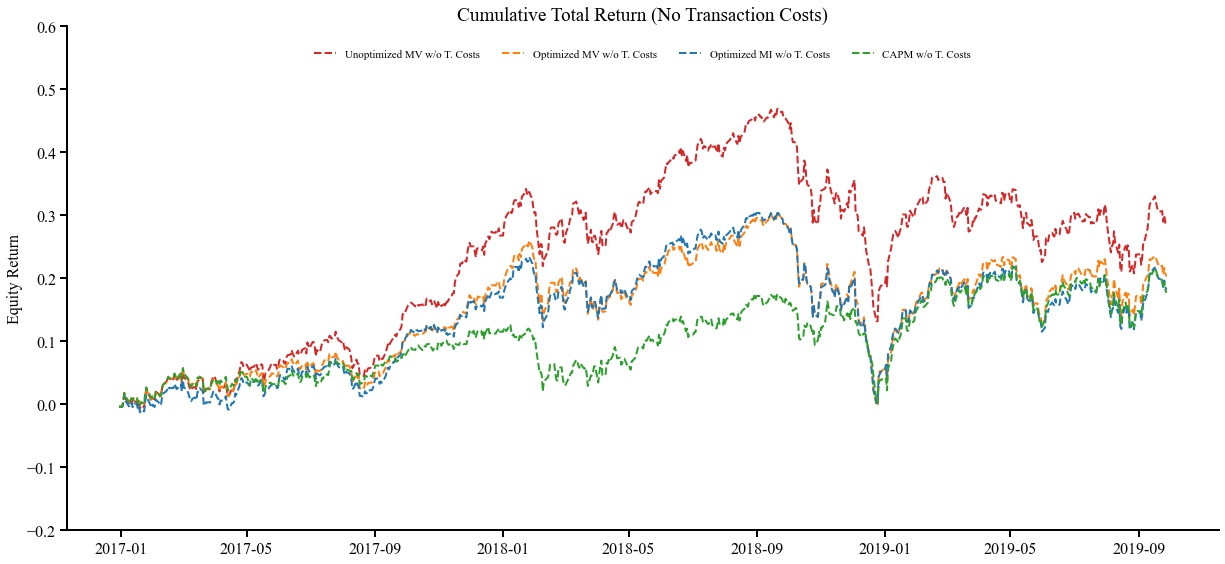

In [10]:
# Plot Daily Portfolio Performance Values
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.yaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(return_dfs[0]['net'], linewidth=2, linestyle='dashed', color=colors(3), label='Unoptimized MV w/o T. Costs')
#ax.plot(return_dfs[5]['net'], linewidth=2, color=colors(3), label='Unoptimized MV with T. Costs')
ax.plot(return_dfs[1]['net'], linewidth=2, linestyle='dashed', color=colors(1), label='Optimized MV w/o T. Costs')
#ax.plot(return_dfs[6]['net'], linewidth=2, color=colors(1), label='Optimized MV with T. Costs')
ax.plot(return_dfs[2]['net'], linewidth=2, linestyle='dashed', color=colors(0), label='Optimized MI w/o T. Costs')
#ax.plot(return_dfs[7]['net'], linewidth=2, color=colors(0), label='Optimized MI with T. Costs')
ax.plot(return_dfs[4]['net'], linewidth=2, linestyle='dashed', color=colors(2), label='CAPM w/o T. Costs')
#ax.plot(return_dfs[9]['net'], linewidth=2, color=colors(2), label='CAPM with T. Costs')
#ax.plot(return_dfs[3]['net'], linewidth=2, linestyle='dashed', color=colors(9), label='EW w/o Constraints')
#ax.plot(return_dfs[8]['net'], linewidth=2, color=colors(9), label='EW with Constraints')
#ax.plot(return_dfs[0]['msci'], linewidth=2, color=colors(3), label='MSCI')
ax.set_ylim(-0.2, 0.6)
ax.set_ylabel('Equity Return')
ax.legend(bbox_to_anchor=(0.5,0.975), loc="upper center", ncol=4, frameon=False, fontsize=11)
ax.set_title('Cumulative Total Return (No Transaction Costs)')
plt.show()

In [11]:
ax.figure.savefig('Backtest-daily-no-trading-costs.png', dpi=200, transparent=False, bbox_inches='tight')

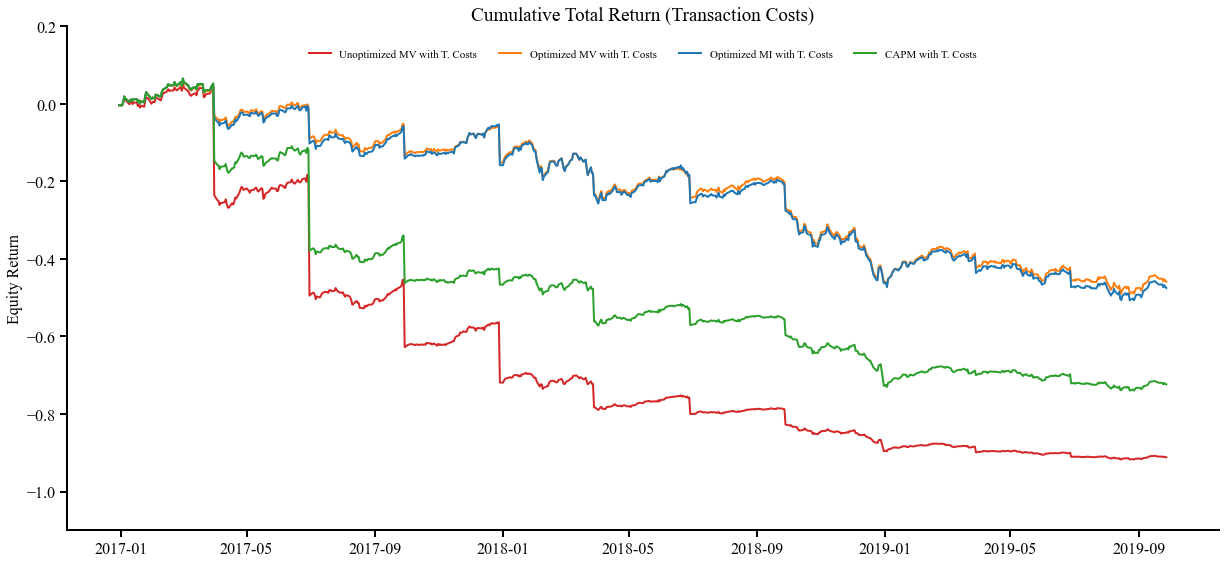

In [12]:
# Plot Daily Portfolio Performance Values
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.yaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.plot(return_dfs[0]['net'], linewidth=2, linestyle='dashed', color=colors(3), label='Unoptimized MV w/o T. Costs')
ax.plot(return_dfs[5]['net'], linewidth=2, color=colors(3), label='Unoptimized MV with T. Costs')
#ax.plot(return_dfs[1]['net'], linewidth=2, linestyle='dashed', color=colors(1), label='Optimized MV w/o T. Costs')
ax.plot(return_dfs[6]['net'], linewidth=2, color=colors(1), label='Optimized MV with T. Costs')
#ax.plot(return_dfs[2]['net'], linewidth=2, linestyle='dashed', color=colors(0), label='Optimized MI w/o T. Costs')
ax.plot(return_dfs[7]['net'], linewidth=2, color=colors(0), label='Optimized MI with T. Costs')
#ax.plot(return_dfs[4]['net'], linewidth=2, linestyle='dashed', color=colors(2), label='CAPM w/o T. Costs')
ax.plot(return_dfs[9]['net'], linewidth=2, color=colors(2), label='CAPM with T. Costs')
#ax.plot(return_dfs[3]['net'], linewidth=2, linestyle='dashed', color=colors(9), label='EW w/o Constraints')
#ax.plot(return_dfs[8]['net'], linewidth=2, color=colors(9), label='EW with Constraints')
#ax.plot(return_dfs[0]['msci'], linewidth=2, color=colors(3), label='MSCI')
ax.set_ylim(-1.1, 0.2)
ax.set_ylabel('Equity Return')
ax.legend(bbox_to_anchor=(0.5,0.975), loc="upper center", ncol=4, frameon=False, fontsize=11)
ax.set_title('Cumulative Total Return (Transaction Costs)')
plt.show()

In [13]:
ax.figure.savefig('Backtest-daily-trading-costs.png', dpi=200, transparent=False, bbox_inches='tight')

## Trading Costs

In [14]:
# mv with no constraints trading cost
mv = results.iloc[:,np.r_[25:30]].copy()
# mv with constraints trading cost
mv_tc = results.iloc[:,np.r_[30:35]].copy()
mi_tc = results.iloc[:,np.r_[35:40]].copy()
mv

,mv_gross,mv_net,mv_budget,mv_turnover,mv_volatility
date,,,,,
2016-12-30,2.796064e+07,2.757316e+07,9.999963e+07,0.000000,0.000000
2017-03-31,2.060112e+07,-7.828443e+06,1.044685e+08,2.927772,0.197708
2017-06-30,1.667503e+07,-1.388992e+07,8.118844e+07,0.439182,0.172817
2017-09-29,1.462017e+07,-2.956088e+06,5.471591e+07,-3.334576,0.244073
2017-12-29,1.329142e+07,-2.016105e+06,4.368421e+07,9.939809,0.349996
2018-03-29,4.971182e+06,-1.388200e+06,2.775046e+07,12.978176,0.635954
2018-06-29,6.209005e+06,1.891265e+06,2.425229e+07,-7.854690,0.049959
2018-09-28,5.647310e+06,1.613484e+06,2.124255e+07,-7.657839,0.080891
2018-12-31,2.389776e+06,-6.160908e+05,1.336604e+07,20.142811,139.148373


In [15]:
tc_dfs = [mv, mv_tc, mi_tc]
for i, tc_df in enumerate(tc_dfs):
    tc_dfs[i]['trading_cost'] = tc_df.iloc[:,0] - tc_df.iloc[:,1]
    tc_dfs[i]['net'] = tc_df.iloc[:,2]
    tc_dfs[i]['gross'] = tc_df['net'] + tc_df['trading_cost']
    tc_dfs[i]['trading_cost'] = tc_dfs[i]['trading_cost'] / tc_dfs[i]['net']
    tc_dfs[i] = tc_dfs[i][['gross', 'net', 'trading_cost']]
    tc_dfs[i] = tc_dfs[i][1:].resample('D').pad()

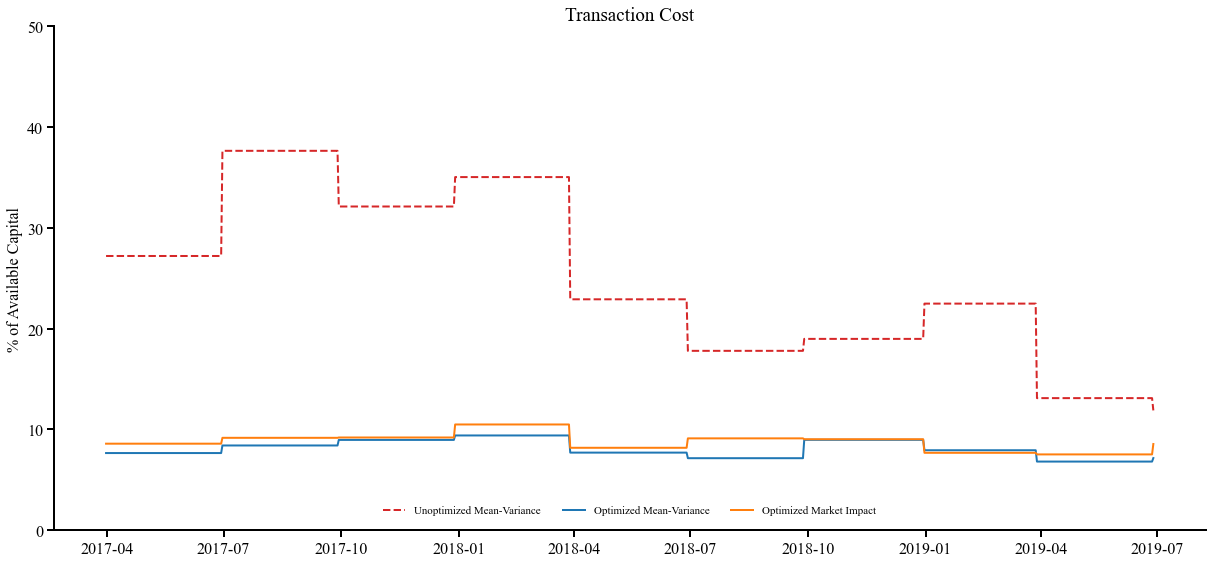

In [16]:
# Plot Daily Portfolio Performance Values
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.yaxis.set_tick_params(which='both', size=7, width=2, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(tc_dfs[0]['trading_cost'] * 100, linewidth=2, linestyle='dashed', color=colors(3), label='Unoptimized Mean-Variance')
ax.plot(tc_dfs[1]['trading_cost'] * 100, linewidth=2, color=colors(0), label='Optimized Mean-Variance')
ax.plot(tc_dfs[2]['trading_cost'] * 100, linewidth=2, color=colors(1), label='Optimized Market Impact')
ax.set_ylim(0, 50)
ax.set_ylabel('% of Available Capital')
ax.legend(bbox_to_anchor=(0.5,0.01), loc="lower center", ncol=4, frameon=False, fontsize=11)
ax.set_title('Transaction Cost')
plt.show()
#_ = plt.xticks(rotation=60)

In [17]:
ax.figure.savefig('Trading Cost.png', dpi=300, transparent=False, bbox_inches='tight')

## Metrics

### Information Ratio

$$
IR = \frac{R_f - R_{MSCI}}{\sigma_{Daily Outperformance}}
$$

In [18]:
# no trading cost
mv = daily.iloc[:,np.r_[0:3]].copy()
mv_constraints = daily.iloc[:,np.r_[3:6]].copy()
mi_constraints = daily.iloc[:,np.r_[6:9]].copy()
ew = daily.iloc[:,np.r_[9:12]].copy()
capm = daily.iloc[:,np.r_[12:15]].copy()

# trading cost
_mv = daily.iloc[:,np.r_[15:18]].copy()
_mv_constraints = daily.iloc[:,np.r_[18:21]].copy()
_mi_constraints = daily.iloc[:,np.r_[21:24]].copy()
_ew = daily.iloc[:,np.r_[24:27]].copy()
_capm = daily.iloc[:,np.r_[27:30]].copy()
mv

,mv_gross_nav_no_trading_cost,mv_net_nav_no_trading_cost,mv_no_trading_cost
date,,,
2016-12-30,20430378.36,20036331.58,9.959969e+07
2016-12-31,20430378.36,20036331.58,9.959969e+07
2017-01-01,20430378.36,20036331.58,9.959969e+07
2017-01-02,20430378.36,20036331.58,9.959969e+07
2017-01-03,20502359.00,20108313.00,1.003108e+08
...,...,...,...
2019-09-25,30100043.00,29721589.00,1.300176e+08
2019-09-26,30231332.00,29852878.00,1.288510e+08
2019-09-27,29987891.00,29609437.00,1.282991e+08


In [19]:
metrics_dfs = [mv, mv_constraints, mi_constraints, ew, capm, _mv, _mv_constraints, _mi_constraints, _ew, _capm,]
for i, metrics_df in enumerate(metrics_dfs):
    metrics_dfs[i]['trading_cost'] = metrics_df.iloc[:,0] - metrics_df.iloc[:,1]
    metrics_dfs[i]['net'] = metrics_df.iloc[:,2]
    metrics_dfs[i]['gross'] = metrics_df['net'] + metrics_df['trading_cost']
    metrics_dfs[i] = metrics_dfs[i] / 1e8 - 1
    metrics_dfs[i] = pd.merge(metrics_dfs[i].iloc[:,4:6], benchmark, left_index=True, right_index=True)
    metrics_dfs[i]['msci'] = metrics_dfs[i]['msci'] / metrics_dfs[i]['msci'].iloc[0] - 1

In [20]:
ir_dfs = []
information_ratios = []

dfs = ['mv', 'mv_constraints', 'mi_constraints', 'ew', 'capm', 'mv_tc', 'mv_constraints_tc', 'mi_constraints_tc', 'ew_tc', 'capm_tc']
for i, _ in enumerate(metrics_dfs):
    diff = metrics_dfs[i]['net'] - metrics_dfs[i]['msci']
    sigma = np.sqrt(252) * np.std(diff.values, ddof=1)
    out_performance = metrics_dfs[i]['net'].iloc[-1] - metrics_dfs[0]['msci'].iloc[-1]
    ir = out_performance / sigma
    #print(ir)
    information_ratios.append(ir)
    
ir_ = {
'portfolio': dfs,
'information_ratio': information_ratios
}
information_ratio = pd.DataFrame(ir_).set_index('portfolio').T + 1
information_ratio

portfolio,mv,mv_constraints,mi_constraints,ew,capm,mv_tc,mv_constraints_tc,mi_constraints_tc,ew_tc,capm_tc
information_ratio,0.961744,0.796689,0.8018,0.860852,0.80084,0.790133,0.794511,0.792791,0.788619,0.787022


#### Max Drawdown

In [21]:
mdd = []
daily_drawdowns = []
max_drawdowns = []
for i, _ in enumerate(metrics_dfs):
    daily = ( metrics_dfs[i].iloc[:,1].copy() + 1 )* 1e8
    window = 252
    
    # Calculate the Roll Max and Daily Drawdowns
    Roll_Max = daily.rolling(window, min_periods=1).max()
    Daily_Drawdown = daily/Roll_Max - 1.0
    daily_drawdowns.append(Daily_Drawdown)

    # Next we calculate the minimum (negative) daily drawdown in that window.
    Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
    max_drawdowns.append(Max_Daily_Drawdown)
    print(f" Max Drawdown for {dfs[i]}: {np.min(Max_Daily_Drawdown) * 100:.2f}%")
    mdd.append(np.min(Max_Daily_Drawdown))

 Max Drawdown for mv: -22.88%
 Max Drawdown for mv_constraints: -23.37%
 Max Drawdown for mi_constraints: -23.07%
 Max Drawdown for ew: -26.26%
 Max Drawdown for capm: -14.57%
 Max Drawdown for mv_tc: -75.12%
 Max Drawdown for mv_constraints_tc: -42.16%
 Max Drawdown for mi_constraints_tc: -42.91%
 Max Drawdown for ew_tc: -98.59%
 Max Drawdown for capm_tc: -52.67%


 Max Drawdown for mi_constraints_tc: -42.91%


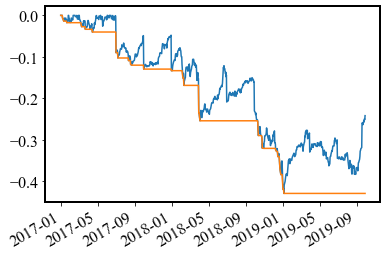

<AxesSubplot:>

In [22]:
def draw_MDD(name='mi_constraints_tc'):
    """
    name::str
    
    "mv": Mean Variance without Transaction Costs
    "mv_constraints": Mean Variance Portfolio without Transaction Costs
    "mi_constraints": Market Impact Portfolio without Transaction Costs
    "ew": EW L/S Portfolio without Transaction Costs
    "capm" CAPM Portfolio without Transaction Costs
    
    "mv_tc": Mean Variance with Transaction Costs
    "mv_constraints_tc": Mean Variance Portfolio with Transaction Costs
    "mi_constraints_tc": Market Impact Portfolio with Transaction Costs
    "ew_tc": EW L/S Portfolio with Transaction Costs
    "capm_tc" CAPM Portfolio with Transaction Costs
    
    Draws MaxDrawdown plot for the corresponding parameter
    """
    index = dfs.index(name)
    print(f" Max Drawdown for {dfs[index]}: {np.min(mdd[index]) * 100:.2f}%")
    # Plot the results
    fig = plt.figure()
    fig = daily_drawdowns[index].plot()
    fig = max_drawdowns[index].plot()
    plt.show()
    return fig
    
draw_MDD()

In [23]:
mdd_ = {
    'portfolio': dfs,
    'mdd': mdd
}
max_drawdown = pd.DataFrame(mdd_).set_index('portfolio').T
max_drawdown

portfolio,mv,mv_constraints,mi_constraints,ew,capm,mv_tc,mv_constraints_tc,mi_constraints_tc,ew_tc,capm_tc
mdd,-0.228839,-0.233661,-0.230678,-0.26258,-0.145743,-0.751154,-0.421631,-0.429089,-0.985853,-0.526699


### Portfolio Turnover

In [24]:
# mv with no trading cost
mv = results.iloc[:,np.r_[25:30]].copy()
# mv with trading cost
mv_tc = results.iloc[:,np.r_[30:35]].copy()
mi_tc = results.iloc[:,np.r_[35:40]].copy()
metrics_dfs_ = [mv, mv_tc, mi_tc]
mv

,mv_gross,mv_net,mv_budget,mv_turnover,mv_volatility
date,,,,,
2016-12-30,2.796064e+07,2.757316e+07,9.999963e+07,0.000000,0.000000
2017-03-31,2.060112e+07,-7.828443e+06,1.044685e+08,2.927772,0.197708
2017-06-30,1.667503e+07,-1.388992e+07,8.118844e+07,0.439182,0.172817
2017-09-29,1.462017e+07,-2.956088e+06,5.471591e+07,-3.334576,0.244073
2017-12-29,1.329142e+07,-2.016105e+06,4.368421e+07,9.939809,0.349996
2018-03-29,4.971182e+06,-1.388200e+06,2.775046e+07,12.978176,0.635954
2018-06-29,6.209005e+06,1.891265e+06,2.425229e+07,-7.854690,0.049959
2018-09-28,5.647310e+06,1.613484e+06,2.124255e+07,-7.657839,0.080891
2018-12-31,2.389776e+06,-6.160908e+05,1.336604e+07,20.142811,139.148373


In [25]:
metrics_dfs_to = metrics_dfs_[:]
tf_dfs = []
turnovers = []
for i, _ in enumerate(metrics_dfs_to):
    curr_df = metrics_dfs_to[i].reset_index()
    curr_df['Year'] = curr_df['date'].dt.year
    curr_df = curr_df.iloc[:, np.r_[2, 4, 6]].copy()
    year_col = curr_df.columns[-1]
    turnover_col = curr_df.columns[1]
    turnover = curr_df.groupby(year_col)[turnover_col].sum()[1:]
    turnovers.append(turnover)
    #print(turnover)

In [26]:
turnovers = pd.DataFrame(turnovers).T
turnovers

,mv_turnover,mv_constraints_turnover,mi_constraints_turnover
Year,,,
2017,9.972187,1.366050,2.182602
2018,17.608459,-5.154240,-7.385412
2019,6.436385,-0.268329,1.091393


In [27]:
turnovers.mean(axis=0)

mv_turnover                11.339010
mv_constraints_turnover    -1.352173
mi_constraints_turnover    -1.370473
dtype: float64

### Gross and Net Return

In [28]:
returns = []
metrics_dfs_returns = metrics_dfs_[:]
for i, df in enumerate(metrics_dfs_returns):
    metrics_dfs_returns[i]['trading_cost'] = df.iloc[:,0].copy() - df.iloc[:,1].copy()
    metrics_dfs_returns[i]['net'] = metrics_dfs_returns[i].iloc[:,2].copy()
    metrics_dfs_returns[i]['gross'] = metrics_dfs_returns[i]['net'] + metrics_dfs_returns[i]['trading_cost']
    metrics_dfs_returns[i] = metrics_dfs_returns[i][['gross', 'net']]
    metrics_dfs_returns[i] = metrics_dfs_returns[i] / 1e8 - 1
    metrics_dfs_returns[i] = pd.merge(metrics_dfs_returns[i], benchmark, left_index=True, right_index=True)
    metrics_dfs_returns[i]['msci'] = metrics_dfs_returns[i]['msci'] / metrics_dfs_returns[i]['msci'].iloc[0] - 1
    mean = np.mean(metrics_dfs_returns[i].iloc[1:,:], axis=0)[1] # geometric mean doesn't work with negative numbers
    returns.append(mean)
metrics_dfs_returns[0]

,gross,net,msci
2016-12-30,0.003871,-0.000004,0.000000
2017-03-31,0.328981,0.044685,0.057083
2017-06-30,0.117534,-0.188116,0.084280
2017-09-29,-0.277078,-0.452841,0.127068
2017-12-29,-0.410083,-0.563158,0.195000
2018-03-29,-0.658902,-0.722495,0.182016
2018-06-29,-0.714300,-0.757477,0.218145
2018-09-28,-0.747236,-0.787575,0.303469
2018-12-31,-0.836281,-0.866340,0.119377
2019-03-29,-0.868651,-0.883877,0.268710


In [29]:
d = {
    'Portfolio': ['Unoptimized', 'Optimized Mean-Variance', 'Optimized Market Impact'],
    'Returns': returns
}
returns_ = pd.DataFrame(d).set_index('Portfolio').T
returns_

Portfolio,Unoptimized,Optimized Mean-Variance,Optimized Market Impact
Returns,-0.60768,-0.185834,-0.188513
